In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
# Membaca data csv
df = pd.read_csv('data.csv')
df

,Unnamed: 0,horsepower,price
0,0,111.0,13495.0
1,1,111.0,16500.0
2,2,154.0,16500.0
3,3,102.0,13950.0
4,4,115.0,17450.0
...,...,...,...
195,200,114.0,16845.0
196,201,160.0,19045.0
197,202,134.0,21485.0
198,203,106.0,22470.0


In [26]:
# Menghapus kolom yang tidak di pakai
df.drop(columns='Unnamed: 0',inplace=True)

In [27]:
# Mengecek Missing Values
df.isna().sum()

horsepower    0
price         0
dtype: int64

In [28]:
# Statistik descriptif
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


- Distribusi data horsepower

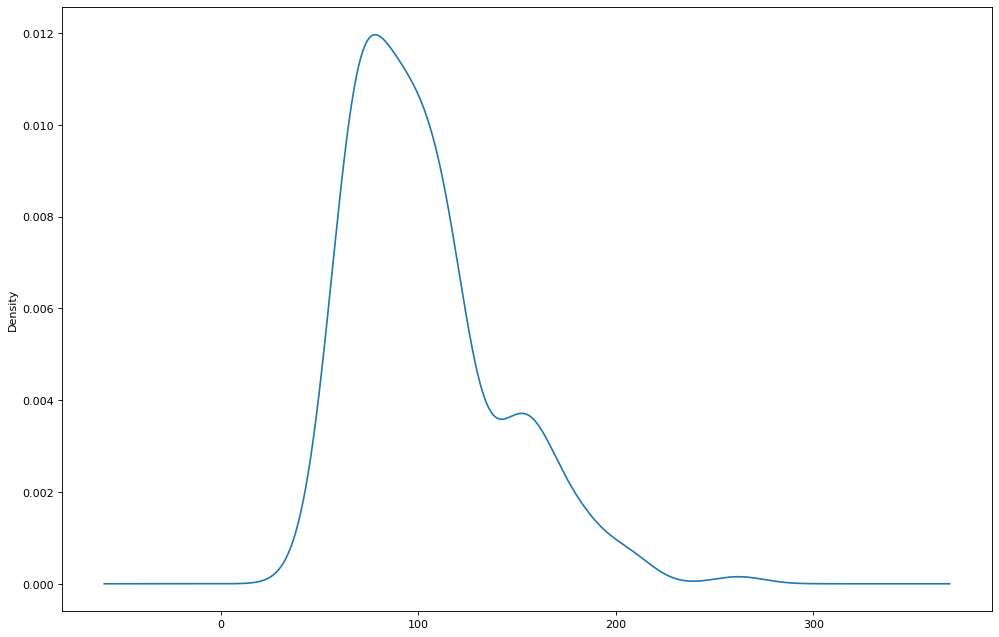

In [29]:
# Mengecek distribusi data
plt.figure(figsize=(15,10),dpi=80)
df['horsepower'].plot(kind='kde')
plt.show()

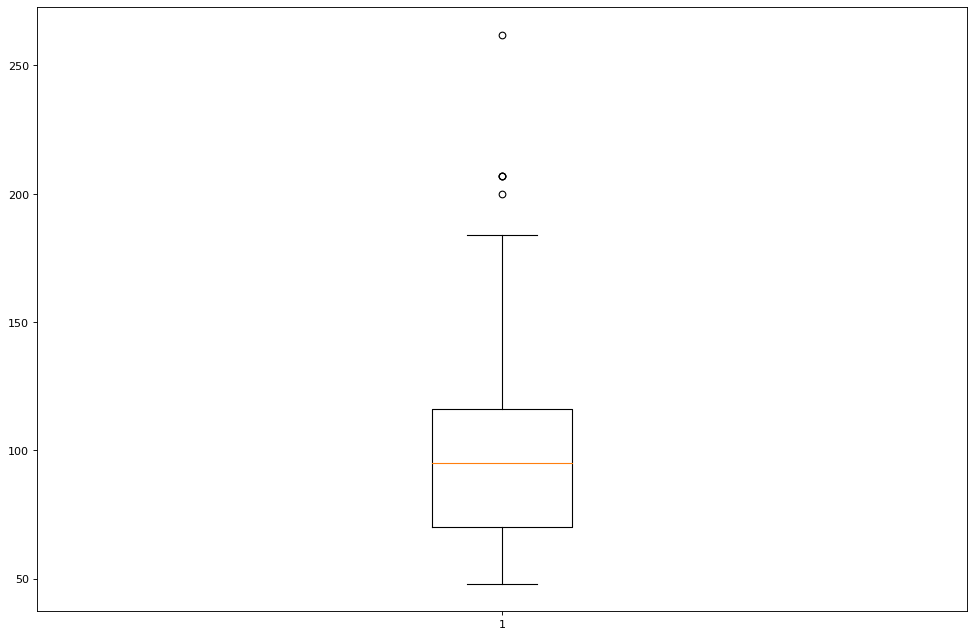

In [30]:
# Mengecek distribusi data
plt.figure(figsize=(15,10),dpi=80)
plt.boxplot(df['horsepower'])
plt.show()

Jika di lihat dari grafik pertama mengenai horsepower data tidak berdistribusi normal, nilai meand dan median ada sekitar pada angka 100an, dan terdapat 3 outlier pada grafik kedua yang mana hal ini membuat data tidak berdistribusi normal.

- Distribusi data price

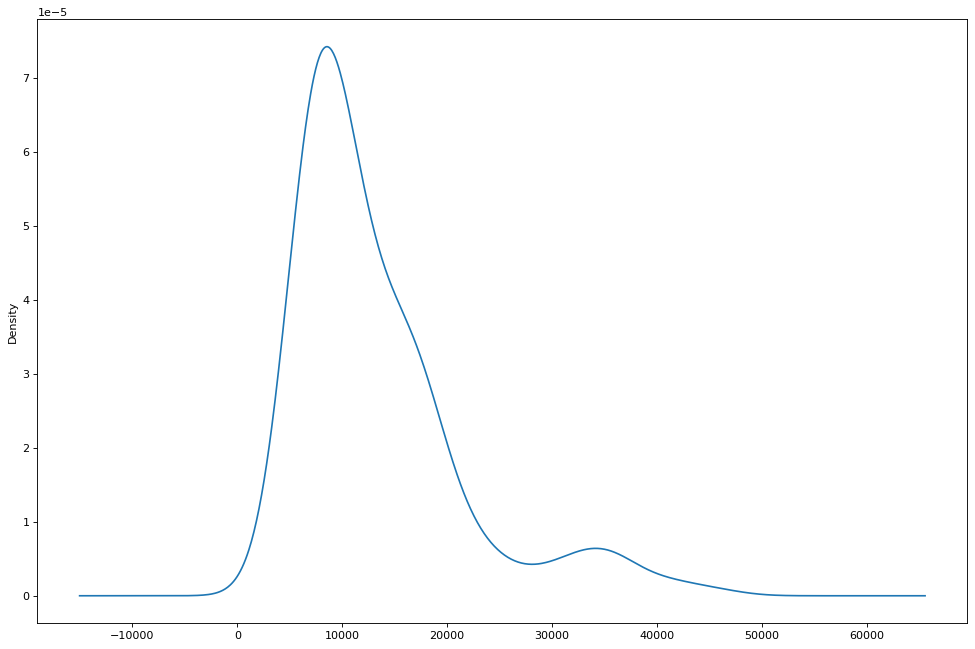

In [31]:
# Mengecek distribusi data
plt.figure(figsize=(15,10),dpi=80)
df['price'].plot(kind='kde')
plt.show()

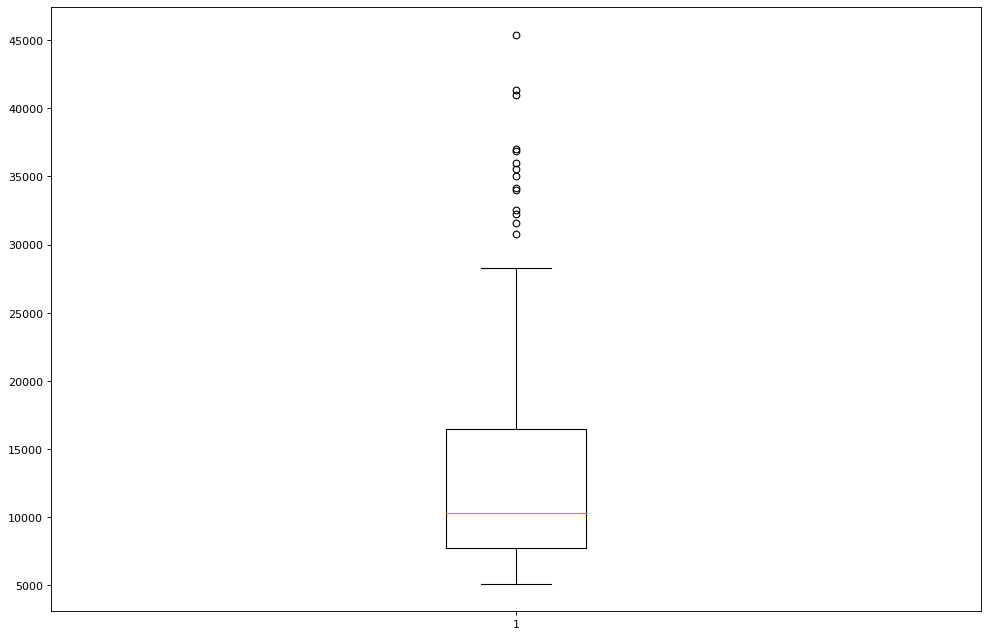

In [32]:
# Mengecek distribusi data
plt.figure(figsize=(15,10),dpi=80)
plt.boxplot(df['price'])
plt.show()

Jika dilihat dari  grafik pertama di atas mengenai kolom price, terdapat nilai mean dan median sekitar di atas 10.000 yang membuat data tidak berdistribusi normal selain itu terdapat banyak outlier pada kolom price di grafik kedua di atas.

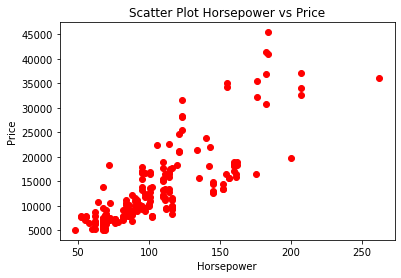

In [33]:
plt.scatter(df['horsepower'], df['price'], color='red')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

Dari hasil grafik di atas, jika dilihat semakin tinggi nilai horsepower maka semakin tinggi price.

<AxesSubplot:>

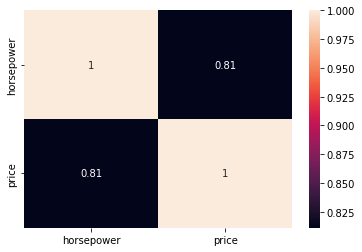

In [34]:
sns.heatmap(df.corr(), annot=True)

Jika dilihat disini nilai horsepower mendekati 1, dan nilai price sudah 1. Hal ini memberikan insight horspower memiliki hubungan/korelasi positif dengan price

# Machine Learning

### Membuat Model

In [35]:
model = linear_model.LinearRegression()

In [36]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [37]:
# Membagi data , untuk latihan 80% dan untuk test 20%
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15,random_state=42)

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
print(model.coef_)
print(model.intercept_)

[[154.21390709]]
[-3054.39725362]


In [46]:
# Melihat score
y_pred = model.predict(x_test)
r_squared = r2_score(y_test,y_pred)
print(f'R-Squared: {r_squared}')

R-Squared: 0.6237436349154829


Model sudah selesai di buat namun score ke akuratan kecil sekitar 62% keakuratannya.

Text(0.5, 1.0, 'Plot Horsepower vs Price')

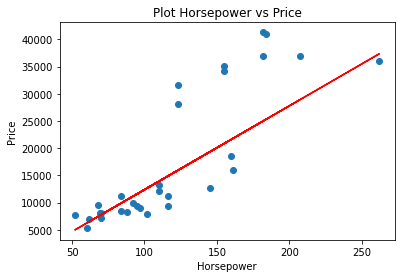

In [41]:
y_prediksi = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

### Mulai Memprediksi harga

In [42]:
model.predict(x).round(2)

array([[14063.35],
       [14063.35],
       [20694.54],
       [12675.42],
       [14680.2 ],
       [13909.13],
       [13909.13],
       [13909.13],
       [18535.55],
       [12521.21],
       [12521.21],
       [15605.49],
       [15605.49],
       [15605.49],
       [25012.53],
       [25012.53],
       [25012.53],
       [ 4347.87],
       [ 7740.58],
       [ 7740.58],
       [ 7432.15],
       [ 7432.15],
       [12675.42],
       [ 7432.15],
       [ 7432.15],
       [ 7432.15],
       [10516.43],
       [19306.62],
       [ 5890.01],
       [ 8665.86],
       [ 6198.44],
       [ 8665.86],
       [ 8665.86],
       [ 8665.86],
       [ 8665.86],
       [10208.  ],
       [10208.  ],
       [10208.  ],
       [10208.  ],
       [12521.21],
       [12366.99],
       [ 8974.29],
       [10824.85],
       [24087.25],
       [24087.25],
       [37349.65],
       [ 7432.15],
       [ 7432.15],
       [ 7432.15],
       [ 7432.15],
       [ 7432.15],
       [12521.21],
       [1252

In [43]:
df['Harga_prediksi'] = model.predict(x)
df

,horsepower,price,Harga_prediksi
0,111.0,13495.0,14063.346433
1,111.0,16500.0,14063.346433
2,154.0,16500.0,20694.544438
3,102.0,13950.0,12675.421270
4,115.0,17450.0,14680.202062
...,...,...,...
195,114.0,16845.0,14525.988155
196,160.0,19045.0,21619.827881
197,134.0,21485.0,17610.266297
198,106.0,22470.0,13292.276898


In [44]:
df['Error'] = df['price'] - df['Harga_prediksi']
df

,horsepower,price,Harga_prediksi,Error
0,111.0,13495.0,14063.346433,-568.346433
1,111.0,16500.0,14063.346433,2436.653567
2,154.0,16500.0,20694.544438,-4194.544438
3,102.0,13950.0,12675.421270,1274.578730
4,115.0,17450.0,14680.202062,2769.797938
...,...,...,...,...
195,114.0,16845.0,14525.988155,2319.011845
196,160.0,19045.0,21619.827881,-2574.827881
197,134.0,21485.0,17610.266297,3874.733703
198,106.0,22470.0,13292.276898,9177.723102


Kesimpulan pembuatan model machine learning :
- Proses pembuatan model regeresi linear memiliki sedikit score yaitu 62%
- Ketika di lakukan prediksi harga model berdasarkan variabel x yaitu horsepower banyak nilai prediksi yang memiliki selisih jauh. Nilai selisih ini dapat di lihat pada kolom error
- Jika score regeresi linear diatas 80% persen maka ini mendekati 100% artinya semakin kecil error/selisih yang di hasilkan dari prediksi dan semakin bagus